In [2]:
import numpy as np
import pandas as pd
#To load training dataset
train_path="./Genre Classification Dataset/train_data.txt"
train_data=pd.read_csv(train_path, sep=':::',names=['title','Genre','Description'],engine='python')
print(train_data)

                                              title          Genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                             Description  
1       Listening in to a conversation between his do...  
2       A brother and sister with a past 

In [2]:
#To check if there is any null value
train_data.isnull()

,title,Genre,Description
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
54210,False,False,False
54211,False,False,False
54212,False,False,False
54213,False,False,False


In [3]:
#To describe what type of dataset we have
train_data.describe()


,title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [4]:
#To find info of dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


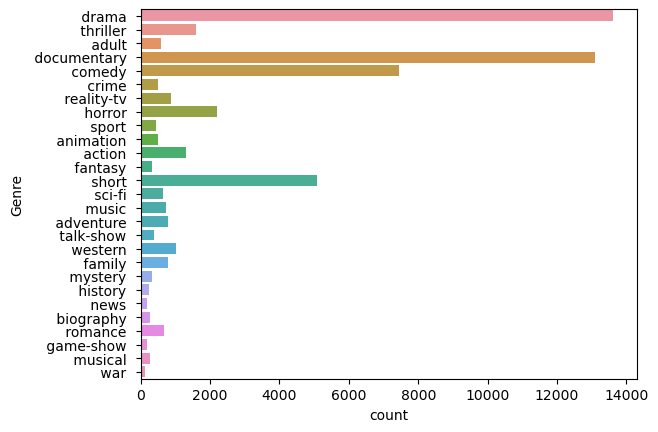

In [5]:
#Import to plot the data
import matplotlib.pyplot as plot
#Seaborn is a library for making statistical graphics in Python.
import seaborn as sns
#To plot
sns.countplot(y='Genre',data=train_data)
plot.show()

In [3]:
#To import required libraries
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer  #For vectorization to convert string to numbers
from sklearn.model_selection import train_test_split   
from sklearn.naive_bayes import MultinomialNB        
from sklearn.metrics import accuracy_score, classification_report
#nltk.download('punkt')
#nltk.download('stopwords')

text="tokenizers/punkt/PY3/english.pickle"
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all character
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

#To load test data
test_path="./Genre Classification Dataset/test_data.txt"
test_data=pd.read_csv(test_path, sep=':::',names=['title','Genre','Description'],engine='python')

#To clean the data
train_data['Text_cleaning'] = train_data.Description.apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)
train_data

,title,Genre,Description,Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [4]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [5]:
# Split the data into training and validation sets
X = X_train # We assign X_train into X as it will be further changed
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()  #It is for discrete data whereas GausianNB is for continuos data
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.44526422576777647
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.0

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#To make predictions
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [7]:
#Test data is the stored into csv file names predicted genres
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

       title                             Genre  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    

In [9]:
#To group by genres
gk = train_data.groupby('Genre')
 
gk.first()

,title,Description,Text_cleaning
Genre,,,
action,Cheongchun highway (1973),Dong-woo is released from prison after a shor...,dong woo released prison short time following ...
adult,"Young, Wild and Wonderful (1980)",As the bus empties the students for their fie...,bus empties students field trip museum natural...
adventure,The Wish Kin (????),Fourteen-year-old Colm Bell and his 11-year-o...,fourteen year old colm bell year old sister ly...
animation,Bird Idol (2010),The story revolves around a bird called 'Humm...,story revolves around bird called hummi happy ...
biography,The Medusa (????),Set during the turmoil of post-Napoleonic Fra...,set turmoil post napoleonic france story cente...
comedy,"""Pink Slip"" (2009)",In tough economic times Max and Joey have all...,tough economic times max joey run ideas discov...
crime,One Step Away (1985),Ron Petrie (Keanu Reeves) is a troubled teen ...,ron petrie keanu reeves troubled teen whose li...
documentary,Quality Control (2011),Quality Control consists of a series of 16mm ...,quality control consists series single take sh...
drama,Oscar et la dame rose (2009),Listening in to a conversation between his do...,listening conversation doctor parents year old...


In [16]:
#To check the percentage of occurences of genres in train_data
train_data['Genre'].value_counts()/len(train_data)*100

Genre
 drama           25.109750
 documentary     24.156122
 comedy          13.736304
 short            9.357362
 horror           4.065371
 thriller         2.934666
 action           2.425573
 western          1.903567
 reality-tv       1.630575
 family           1.446121
 adventure        1.429520
 music            1.348360
 romance          1.239532
 sci-fi           1.193419
 adult            1.088280
 crime            0.931494
 animation        0.918582
 sport            0.796842
 talk-show        0.721216
 fantasy          0.595787
 mystery          0.588409
 musical          0.510938
 biography        0.488804
 history          0.448224
 game-show        0.357841
 news             0.333862
 war              0.243480
Name: count, dtype: float64

In [15]:
#To check the percentage of occurances of genres in predicted genres
test_data['Predicted_Genre'].value_counts()/len(test_data)*100

Predicted_Genre
 drama           58.835793
 documentary     40.520295
 comedy           0.607011
 short            0.036900
Name: count, dtype: float64

In [23]:
sol_path="./Genre Classification Dataset/test_data_solution.txt"
test_data_solution=pd.read_csv(sol_path, sep=':::',names=['title','Genre','Description'],engine='python')

acc = accuracy_score(test_data['Predicted_Genre'], test_data_solution['Genre'])
print("Validation Accuracy:", acc)
#print(classification_report(y_val, y_pred))

Validation Accuracy: 0.4419557195571956
